## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=10, 
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

W0725 13:46:36.645006 16700 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 13:46:36.720768 16700 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 13:46:36.759665 16700 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 13:46:36.914286 16700 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 13:46:37.149657 16700 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

C:\Users\sabri\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 142us/step - loss: 1.7514 - acc: 0.3913 - val_loss: 1.8284 - val_acc: 0.3779
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6220 - acc: 0.4342 - val_loss: 1.6984 - val_acc: 0.4147
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5449 - acc: 0.4598 - val_loss: 1.6406 - val_acc: 0.4302
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4910 - acc: 0.4771 - val_loss: 1.6069 - val_acc: 0.4384
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.4427 - acc: 0.4966 - val_loss: 1.5801 - val_acc: 0.4509
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4030 - acc: 0.5095 - val_loss: 1.5510 - val_acc: 0.4580
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3689 - acc: 0.5225 - val_loss: 1.5370 - val_acc: 0.4629
Epoch 9/50
50000/50000 [=====================

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

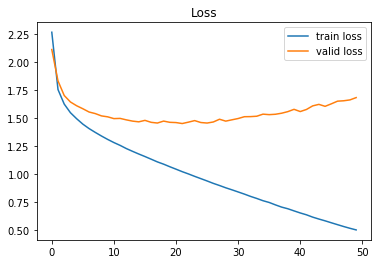

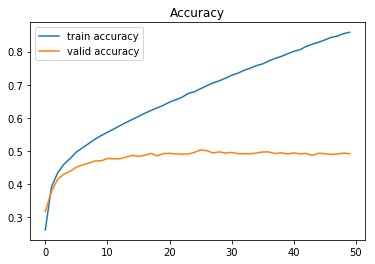

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=25, 
                          verbose=1
                          )
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

C:\Users\sabri\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 7s 143us/step - loss: 1.7497 - acc: 0.3910 - val_loss: 1.8309 - val_acc: 0.3689
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6223 - acc: 0.4311 - val_loss: 1.6986 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5479 - acc: 0.4591 - val_loss: 1.6181 - val_acc: 0.4327
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4915 - acc: 0.4784 - val_loss: 1.5895 - val_acc: 0.4442
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4456 - acc: 0.4955 - val_loss: 1.5644 - val_acc: 0.4447
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4067 - acc: 0.5085 - val_loss: 1.5400 - val_acc: 0.4544
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3688 - acc: 0.5242 - val_loss: 1.5184 - val_acc: 0.4641
Epoch 9/50
50000/50000 [=====================

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

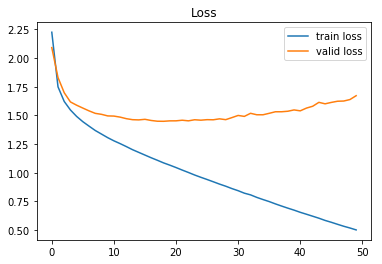

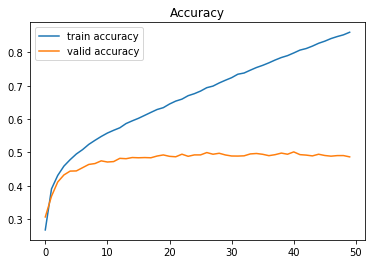

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()